In [3]:
from TestingEssentials import GenerateJ, EvaluateC, C_Max, C_MaxFromC, start_t
from DataVisualization import plot_schedule_fancy
from GeneticAlgorithm import GeneticAlgorithm
from TestingEssentials import getMakData as get_data_from_file
from nehpy import neh
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# data_pack_num = 0
# data_mega_pack = get_data_from_file(100)
# data_pack = data_mega_pack[1]

J, _  = GenerateJ(100,5,5)

J_list = [GenerateJ(10,5,i) for i in range(0,50)]
J_list, _ = zip(*J_list)


# Parametry algorytmu genetycznego
# population_sizes = [50, 100, 200, 300]
# mutation_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
# generations = [500, 1000, 1500, 2000]

mutations = ["hard", "mid","soft"]
crossovers = ["simple", "section", "nearest"]
selections = ["roulette", "tournament"]


population_size = 50
mutation_rate = 0.1
generations = 200

results = []


In [12]:
for mutation in mutations:
    nehcmax = neh(J.copy())
    for crossover in crossovers:
        for selection in selections:
            ga = GeneticAlgorithm(J, 
                        population_size, 
                        mutation_rate, 
                        generations,
                        mutation_type=mutation, 
                        crossover_type=crossover, 
                        selection_type=selection,
                        register_all = False)
            best_solutions = ga.Genetic()
            print(len(best_solutions))
            for i in range(len(best_solutions)):
                best_solution = best_solutions[i]
                best_solution_Cmax = C_Max(J,best_solution)
                percentage = (nehcmax - best_solution_Cmax)
                percentage = percentage/nehcmax
                results.append({'combination': mutation+"_"+crossover+"_"+selection, 'generation': i,'Cmax': best_solution_Cmax, 'percentage': percentage})




best_solution_Cmax = C_Max(J,best_solution)
best_solution = [elem + 1 for elem in best_solution]


# Zapisz wyniki do dataframe
df = pd.DataFrame(results)


200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [6]:
# Wyświetl wyniki
print(df)
df.to_csv('data_combinations_results.csv', index=False)
#plot_schedule_fancy(best_solution, J, start_t(J, best_solution,(EvaluateC(J,best_solution)))) 

                  combination  generation  Cmax  percentage
0        hard_simple_roulette           0  1207   -0.059701
1        hard_simple_roulette           1  1207   -0.059701
2        hard_simple_roulette           2  1207   -0.059701
3        hard_simple_roulette           3  1207   -0.059701
4        hard_simple_roulette           4  1207   -0.059701
...                       ...         ...   ...         ...
1795  soft_nearest_tournament          95  1187   -0.042142
1796  soft_nearest_tournament          96  1187   -0.042142
1797  soft_nearest_tournament          97  1187   -0.042142
1798  soft_nearest_tournament          98  1187   -0.042142
1799  soft_nearest_tournament          99  1187   -0.042142

[1800 rows x 4 columns]


In [7]:
# mean_for_each_pop_value = df.groupby('Population Size')['percentage'].mean()
# mean_for_each_mut_value = df.groupby('Mutation Rate')['percentage'].mean()
# mean_for_each_gen_value = df.groupby('Generations')['percentage'].mean()
# mean_for_each_config = df.groupby(['Generations','Population Size','Mutation Rate'])['percentage'].mean()

# # print(mean_for_each_pop_value)
# print(mean_for_each_config)
# # print(mean_for_each_gen_value)


# # Znajdź indeksy dla maksymalnych wartości średnich w kolumnie 'percentage'
# best_config_index = mean_for_each_config.idxmax()

# print(best_config_index)

# # Wyświetl kombinację parametrów dla najlepszej średniej 'percentage'
# best_config_params = df.loc[best_config_index]
# print(best_config_params)

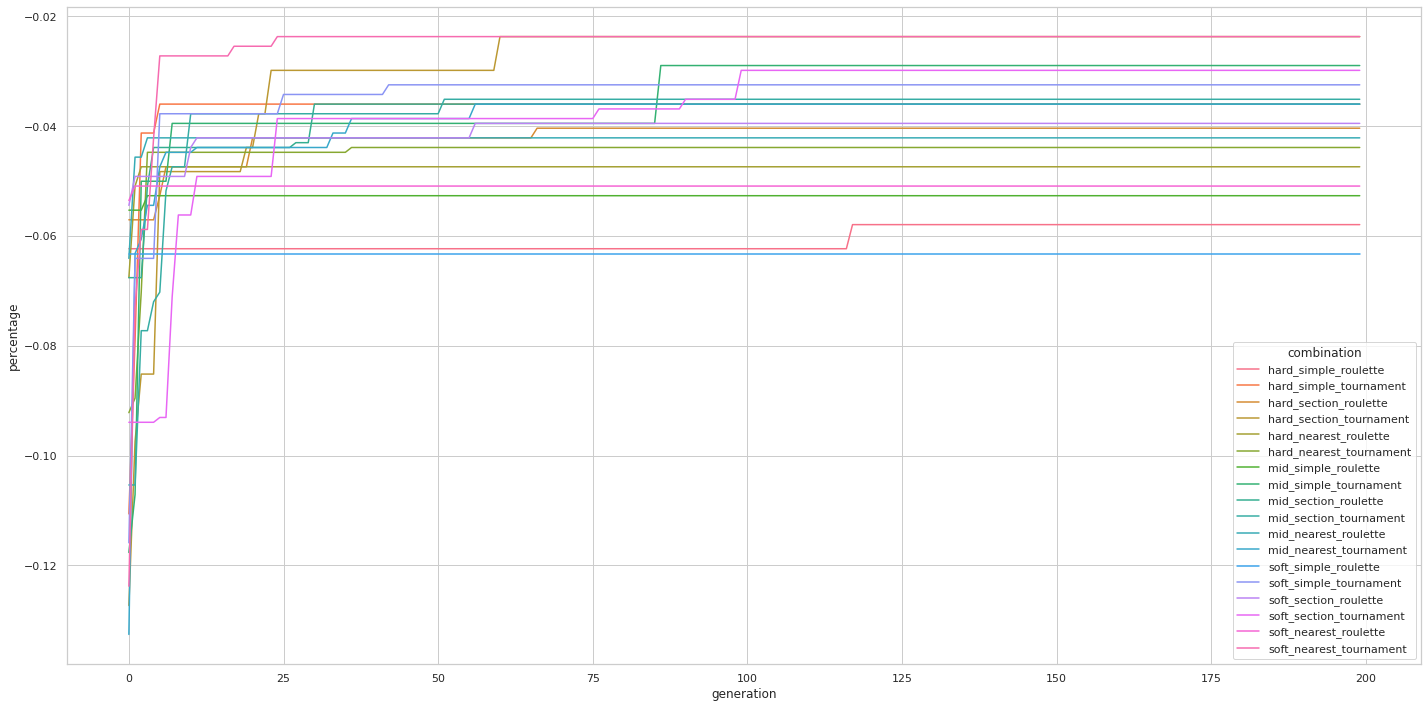

In [13]:
# Ustawienie stylu wykresów
sns.set(style="whitegrid")

# Utwórz siatkę wykresów
fig = plt.subplots(figsize=(20, 10))

# # Wykres zależności Cmax od parametru population_size
# sns.scatterplot(ax=axes, x='Population Size', y='percentage', data=df, alpha=0.2)
# mean_for_each_pop_value.plot(ax=axes, color='r', linestyle='--', label='Średnia percentage dla Population Size')
# axes.set_title('Wpływ parametru population_size na Cmax')
# axes.set_xlabel('Population Size')
# axes.set_ylabel('Cmax')

sns.lineplot(x='generation', y='percentage', data=df, hue='combination')

# Wyświetl wykresy
plt.tight_layout()
plt.show()


In [20]:
# Znajdź najmniejszą wartość Cmax
min_Cmax = df['Cmax'].min()

# Wybierz rekordy z najmniejszym Cmax
min_Cmax_records = df[df['Cmax'] == min_Cmax]

# Wyświetl wyniki
print(min_Cmax_records)

best_config_index = mean_for_each_config.idxmax()

print("Generations, Population Size, Mutation Rate")
print(best_config_index)

               combination  generation  Cmax  percentage
738  mid_simple_tournament          38  1165   -0.022827
739  mid_simple_tournament          39  1165   -0.022827
740  mid_simple_tournament          40  1165   -0.022827
741  mid_simple_tournament          41  1165   -0.022827
742  mid_simple_tournament          42  1165   -0.022827
..                     ...         ...   ...         ...
795  mid_simple_tournament          95  1165   -0.022827
796  mid_simple_tournament          96  1165   -0.022827
797  mid_simple_tournament          97  1165   -0.022827
798  mid_simple_tournament          98  1165   -0.022827
799  mid_simple_tournament          99  1165   -0.022827

[62 rows x 4 columns]


NameError: name 'mean_for_each_config' is not defined